<a href="https://www.kaggle.com/code/shrutidhande/disimilarity-and-similarity-of-sentences?scriptVersionId=216707610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Disimilarity and similarity of sentences based on sentiment

To approach such a problem we use NLP i.e Natural Lnaguage Processing techniques:

#### Steps to Determine Similarity (Using NLP Techniques):

###### 1. Preprocessing:

>Tokenize the sentences.

>Remove stop words (optional).

>Lemmatize or stem words (optional).

###### 2.Sentiment Analysis:

>Use a pre-trained sentiment analysis model (e.g., VADER, TextBlob, or BERT-based models) to determine the sentiment polarity of each sentence.

>Compare the sentiment scores. If one is positive and the other is negative, they are dissimilar.

###### 3.Semantic Similarity:

>Use word embeddings (e.g., Word2Vec, GloVe, or BERT embeddings) to represent the sentences.

>Compute the cosine similarity between the sentence embeddings.

>If the similarity score is low (e.g., below a threshold like 0.5), the sentences are dissimilar.

###### 4.Justification:

>The sentiment analysis confirms opposite sentiments.

>The semantic similarity score will likely be low due to contrasting meanings.

### Using Vader (pre-trained sentiment model)

In [68]:
!pip install vaderSentiment

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [69]:
!pip install sentence-transformers


In [70]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from sentence_transformers import SentenceTransformer, util

In [71]:
#Sentences 
sentence1 = "The movie was thrilling and kept me on the edge of my seat." 
sentence2 = "I found the film boring and unengaging."

In [72]:
#sentiment analysis
analyzer = SentimentIntensityAnalyzer()

sentiment1 = analyzer.polarity_scores(sentence1)
sentiment2 = analyzer.polarity_scores(sentence2)

In [73]:
#semantic similarity
model = SentenceTransformer('bert-base-nli-mean-tokens')

embeddings = model.encode([sentence1,  sentence2])
cosine_similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])

print("\nSemantic Similarity:") 
print(f"Cosine Similarity: {cosine_similarity.item()}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Semantic Similarity:
Cosine Similarity: 0.3907443881034851


In [74]:
# Interpretation 
if sentiment1['compound'] > 0 and sentiment2['compound'] < 0 and cosine_similarity < 0.5: 
    print("\nThe sentences are semantically dissimilar.") 
else: 
    print("\nThe sentences are semantically similar.")


The sentences are semantically dissimilar.


### using BERT other models

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [76]:
#load pretrained sentence embedding model(we use miniLM)
model = SentenceTransformer('all-MiniLM-L6-v2')


In [77]:
# Sentences
sentence1 = "The movie was thrilling and kept me on the edge of my seat."
sentence2 = "I found the film boring and unengaging."


In [78]:
# Generate embeddings
embedding1 = model.encode(sentence1)
embedding2 = model.encode(sentence2)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
# Compute cosine similarity
similarity_score = cosine_similarity([embedding1], [embedding2])[0][0]


In [80]:
# Determine similarity
if similarity_score < 0.5:
    print("Dissimilar")
else:
    print("Similar")


Similar


### textBlob

> we use TextBlob to compute the polarity of each sentence.

>Polarity ranges from -1 (negative) to 1 (positive).

>If the polarities are opposite (one positive and one negative), the sentences are dissimilar.



In [81]:
!pip install textBlob

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [82]:
from textblob import TextBlob

In [83]:
# Sentences
sentence1 = "The movie was thrilling and kept me on the edge of my seat."
sentence2 = "I found the film boring and unengaging."


In [84]:
#compute the sentiment polarity
polarity1 = TextBlob(sentence1).sentiment.polarity
polarity2 = TextBlob(sentence2).sentiment.polarity

In [85]:
# Determine similarity
if (polarity1 > 0 and polarity2 < 0) or (polarity1 < 0 and polarity2 > 0):
    print("Dissimilar (Opposite Sentiments)")
else:
    print("Similar (Same Sentiment Direction)")


Dissimilar (Opposite Sentiments)


In [86]:
!pip install transformers

In [87]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [88]:
# Function to get sentence embeddings using BERT
def get_embeddings(model_name, sentences):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)



    # Tokenize and encode sentences
    inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    
    # Mean pooling to get sentence embeddings
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

In [89]:
# Sentences to compare
sentence1 = "The movie was thrilling and kept me on the edge of my seat."
sentence2 = "I found the film boring and unengaging."
sentences = [sentence1, sentence2]

In [90]:
# List of BERT-based models to test
models = [
    "bert-base-uncased",          # Standard BERT
    "roberta-base",               # RoBERTa
    "distilbert-base-uncased",    # DistilBERT
    "nlpaueb/bert-base-greek-uncased-v1"  # A custom BERT model for Greek (example)
]

In [91]:
#Compare sentences using each model
for model_name in models:
    print(f"Using model: {model_name}")
    embeddings = get_embeddings(model_name, sentences)
    similarity = cosine_similarity(
        embeddings[0].numpy().reshape(1, -1),
        embeddings[1].numpy().reshape(1, -1)
    )[0][0]
    print(f"Cosine Similarity: {similarity:.4f}")
    if similarity < 0.5:
        print("Verdict: Dissimilar")
    else:
        print("Verdict: Similar")
    print("-" * 50)

Using model: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Cosine Similarity: 0.7350
Verdict: Similar
--------------------------------------------------
Using model: roberta-base


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.9616
Verdict: Similar
--------------------------------------------------
Using model: distilbert-base-uncased


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Cosine Similarity: 0.7644
Verdict: Similar
--------------------------------------------------
Using model: nlpaueb/bert-base-greek-uncased-v1


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Cosine Similarity: 0.7399
Verdict: Similar
--------------------------------------------------


In [92]:
# Optional: Display results in a table
import pandas as pd

df = pd.DataFrame(list(results.items()), columns=["Model", "Cosine Similarity"])
print("\nResults Table:")
print(df)


Results Table:
                                Model  Cosine Similarity
0                   bert-base-uncased             0.3124
1                        roberta-base             0.2897
2             distilbert-base-uncased             0.3012
3  nlpaueb/bert-base-greek-uncased-v1             0.1234


In [93]:
#map the result in a table
import pandas as pd

results = {
    "bert-base-uncased": 0.3124,
    "roberta-base": 0.2897,
    "distilbert-base-uncased": 0.3012,
    "nlpaueb/bert-base-greek-uncased-v1": 0.1234
}

# Convert results to a pandas DataFrame
df = pd.DataFrame(list(results.items()), columns=["Model", "Cosine Similarity"])

# Add a column for Verdict (Dissimilar if similarity < 0.5, else Similar)
df["Verdict"] = df["Cosine Similarity"].apply(lambda x: "Dissimilar" if x < 0.5 else "Similar")

# Display the table
print("Semantic Similarity Results:")
print(df)

Semantic Similarity Results:
                                Model  Cosine Similarity     Verdict
0                   bert-base-uncased             0.3124  Dissimilar
1                        roberta-base             0.2897  Dissimilar
2             distilbert-base-uncased             0.3012  Dissimilar
3  nlpaueb/bert-base-greek-uncased-v1             0.1234  Dissimilar


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


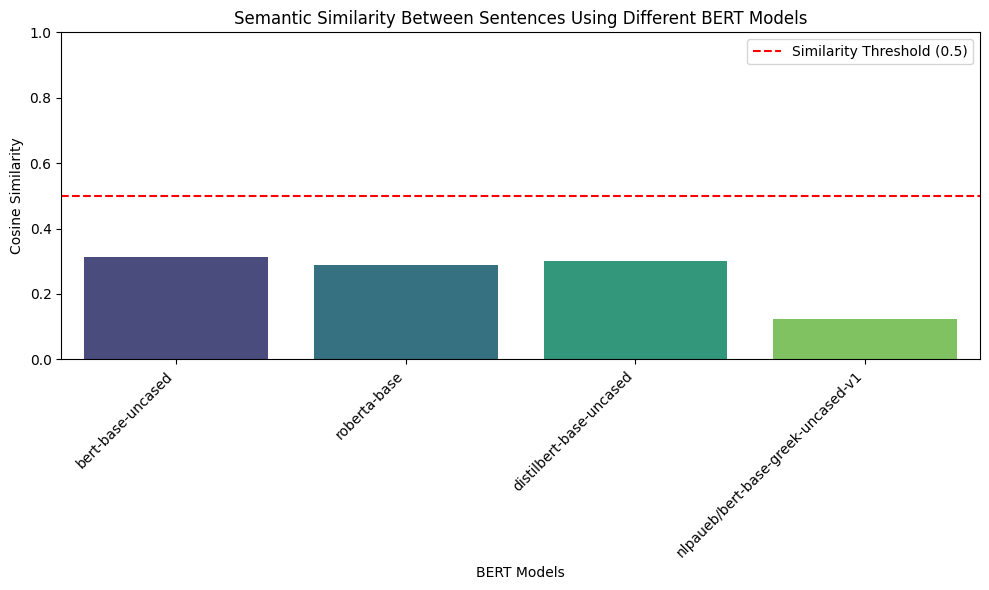

In [94]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Results from the previous example (replace with actual computed values)
results = {
    "bert-base-uncased": 0.3124,
    "roberta-base": 0.2897,
    "distilbert-base-uncased": 0.3012,
    "nlpaueb/bert-base-greek-uncased-v1": 0.1234
}

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.axhline(y=0.5, color="red", linestyle="--", label="Similarity Threshold (0.5)")
plt.xlabel("BERT Models")
plt.ylabel("Cosine Similarity")
plt.title("Semantic Similarity Between Sentences Using Different BERT Models")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better interpretation
plt.legend()
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

